In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Algos/multiple_linear_regression.csv')

In [3]:
df = data.copy()

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.describe()

,Feature 1,Feature 2,Feature 3,Target
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isna().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [9]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

# Data Processing

In [10]:
df = df.dropna()

In [11]:
df.shape

(200, 4)

## Splitting Data

In [12]:
df.columns

Index(['Feature 1', 'Feature 2', 'Feature 3', 'Target'], dtype='object')

In [13]:
output_col = 'Target'

In [14]:
x = df.iloc[:,df.columns != output_col]

In [15]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [16]:
y = df.loc[:,output_col:]

In [17]:
y.head()

,Target
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 43)

In [19]:
data.shape

(200, 4)

In [20]:
df.shape

(200, 4)

In [21]:
X_train.shape

(140, 3)

In [22]:
X_test.shape

(60, 3)

In [23]:
y_train.shape

(140, 1)

In [24]:
y_test.shape

(60, 1)

## Linear Regression

### Trainning

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [29]:
lr.intercept_

array([3.0777745])

### Prediction

In [30]:
pred_value = lr.predict(X_test)

### Cost

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
cost = mean_squared_error(y_test,pred_value)

In [33]:
cost

2.2412862530933473

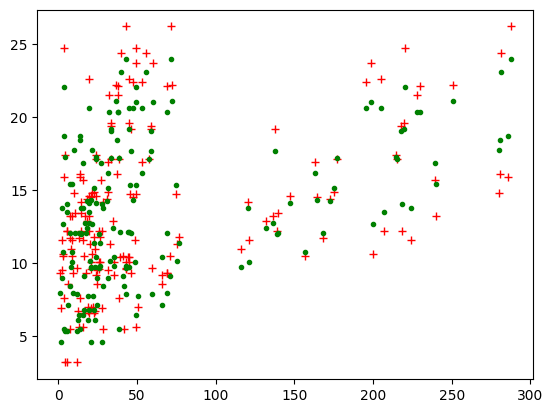

In [34]:
plt.plot(X_test,y_test,'+',color = 'red')
plt.plot(X_test,pred_value,'.',color = 'green')
plt.show()

# Assumptions of linear regression

### Homoscedasticity

In [35]:
pred_value

array([[ 8.41710143],
       [15.36146115],
       [12.08619274],
       [ 9.75953058],
       [11.37799221],
       [18.73526253],
       [23.94158412],
       [ 7.11931733],
       [22.06606191],
       [16.83172907],
       [ 7.93115903],
       [23.07243791],
       [19.15729792],
       [ 5.47677475],
       [15.42102256],
       [ 9.82205717],
       [12.08023645],
       [ 9.76094922],
       [21.07717663],
       [ 9.13945016],
       [20.36205828],
       [12.03862691],
       [13.78082146],
       [10.73225482],
       [16.20061541],
       [ 7.77042699],
       [20.6251206 ],
       [20.31966315],
       [ 8.97266008],
       [14.13746173],
       [17.28381353],
       [15.13827164],
       [17.18376843],
       [19.03374633],
       [17.13952183],
       [12.14670527],
       [12.7815946 ],
       [ 6.08135492],
       [10.06634988],
       [13.48921606],
       [12.01549843],
       [ 9.70107337],
       [ 5.35398678],
       [10.14966171],
       [14.224196  ],
       [14

In [36]:
y_test

,Target
56,5.5
37,14.7
67,13.4
79,11.0
80,11.8
188,15.9
183,26.2
10,8.6
128,24.7
62,15.7


In [37]:
residuals = y_test - pred_value

In [38]:
residuals.head()

,Target
56,-2.917101
37,-0.661461
67,1.313807
79,1.240469
80,0.422008


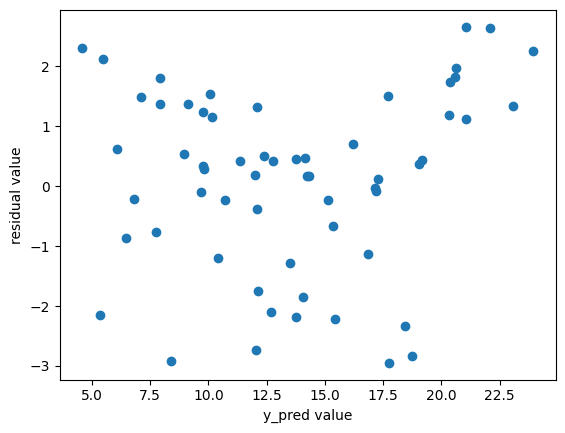

In [39]:
plt.scatter(pred_value,residuals)
plt.xlabel('y_pred value')
plt.ylabel('residual value')
plt.show()

## Normality of residuals

In [40]:
import seaborn as sns

<ipython-input-41-449001059fb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

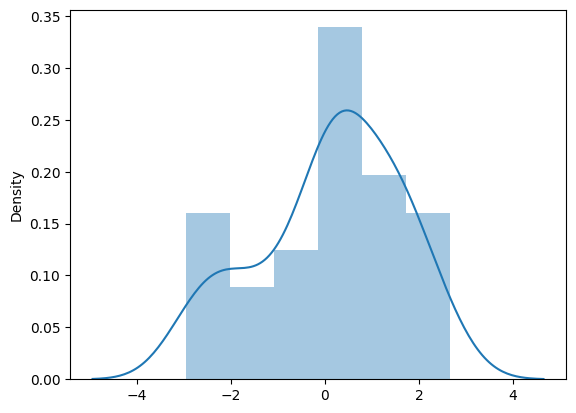

In [41]:
sns.distplot(residuals)

## Ordinary Least Square (OLS) Method

In [42]:
import statsmodels.api as sm

In [43]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [44]:
x_with_constant = sm.add_constant(X_train)

x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [45]:
model = sm.OLS(y_train,x_with_constant)

In [46]:
result = model.fit()

In [47]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [48]:
lr.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [49]:
lr.intercept_

array([3.0777745])

In [50]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.67e-63
Time:                        09:01:03   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

In [51]:
X_test = sm.add_constant(X_test)

In [52]:
y_pred = result.predict(X_test)

In [53]:
y_pred.head()

56     8.417101
37    15.361461
67    12.086193
79     9.759531
80    11.377992
dtype: float64